# Problem 1:

A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

[Assume all of the ANOVA assumptions are satisfied]

1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

1.4) Analyse the effects of one variable on another with the help of an interaction plot.
What is the interaction between the two treatments?
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

1.6) Mention the business implications of performing ANOVA for this particular case study.


#### Volunteer 1 
<pre>
1-1  2-1  3-1 <br>
1-2  2-2  3-2 <br>
1-3  2-3  3-3 <br>
</pre>

#### Volunteer 2 
<pre>
1-1  2-1  3-1 <br>
1-2  2-2  3-2 <br>
1-3  2-3  3-3 <br>
</pre>

#### Volunteer 3 
<pre>
1-1  2-1  3-1 <br>
1-2  2-2  3-2 <br>
1-3  2-3  3-3 <br>
</pre>

#### Volunteer 4 
<pre>
1-1  2-1  3-1 <br>
1-2  2-2  3-2 <br>
1-3  2-3  3-3 <br>
</pre>


4 volunteers, 9 Treatments(different combinations of Ingredients A & B ) and Result as Relief

In [5]:
import os
os.getcwd()

'C:\\Users\\suhas'

In [6]:
os.chdir('C:\\Users\\suhas\\Desktop\\Great Learning\\3.Advanced Statistics\\Final Assignement')

In [7]:
os.getcwd()

'C:\\Users\\suhas\\Desktop\\Great Learning\\3.Advanced Statistics\\Final Assignement'

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df=pd.read_csv('Fever.csv')

In [10]:
df

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6
5,1,2,2,4.2
6,1,2,3,4.9
7,1,2,4,4.7
8,1,3,1,4.8
9,1,3,2,4.5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [12]:
df.isnull().sum().sum()

0

In [13]:
df.describe()

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


In [14]:
df.shape

(36, 4)

Given: all of the ANOVA assumptions are satisfied

##### 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

In [15]:
df_1=df.groupby('Volunteer')

In [16]:
df2=df_1.apply(print)

    A  B  Volunteer  Relief
0   1  1          1     2.4
4   1  2          1     4.6
8   1  3          1     4.8
12  2  1          1     5.8
16  2  2          1     8.9
20  2  3          1     9.1
24  3  1          1     6.1
28  3  2          1     9.9
32  3  3          1    13.5
    A  B  Volunteer  Relief
1   1  1          2     2.7
5   1  2          2     4.2
9   1  3          2     4.5
13  2  1          2     5.2
17  2  2          2     9.1
21  2  3          2     9.3
25  3  1          2     5.7
29  3  2          2    10.5
33  3  3          2    13.0
    A  B  Volunteer  Relief
2   1  1          3     2.3
6   1  2          3     4.9
10  1  3          3     4.4
14  2  1          3     5.5
18  2  2          3     8.7
22  2  3          3     8.7
26  3  1          3     5.9
30  3  2          3    10.6
34  3  3          3    13.3
    A  B  Volunteer  Relief
3   1  1          4     2.5
7   1  2          4     4.7
11  1  3          4     4.6
15  2  1          4     5.3
19  2  2          4 

##### 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

For Variable A,

Ho=> mu1=mu2=mu3=mu4(All volunteers shows same behaviour,Relief hours are independent to Level of A i.e Means are equal,Relief hours does not depends level of A)
<br>
Ha=> mu1!=mu2!=mu3!=mu4(All volunteers shows different behaviour i.e Atleast One mean is not equal,Relief hours depends on levels of A)

For Variable B,

Ho=> mu1=mu2=mu3=mu4(All volunteers shows same behaviour i.e Means are equal,Relief hours does not depends on levels of B)<br>
Ha=> mu1!=mu2!=mu3!=mu4(All volunteers shows different behaviour with the differ in level of B i.e Atleast One mean is not equal,Relief hours depends on levels of B)

##### 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

One way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. <br>

In [17]:
formula = 'Relief ~ C(A)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


For Variable A, Since the p value is less than the significance level (0.05), we can reject the null hupothesis and conclude that there is a difference in the mean of Relief for 4 volunteers. So we can conclude proprtion of A variable matters to get relief.

##### 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

One way ANOVA for variable ‘B' with respect to the variable ‘Relief’. 

In [18]:
formula = 'Relief ~ C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


For Variable B, Since the p value is less than the significance level (0.05), we can reject the null hupothesis and conclude that there is a difference in the mean of Relief for 4 volunteers. So we can conclude proprtion of B variable matters to get relief.

##### 1.4) Analyse the effects of one variable on another with the help of an interaction plot. What is the interaction between the two treatments? [hint: use the ‘pointplot’ function from the ‘seaborn’ function]

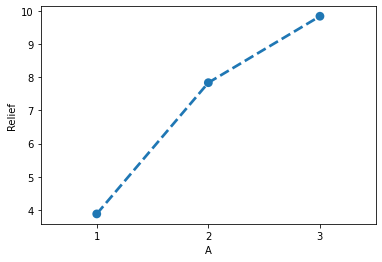

In [35]:
sns.pointplot(x='A', y='Relief' ,data=df, ci=None, linestyles=["--"])

By looking at above point plot we can say that,Number of relief hours increases as we increase level of ingerdient A.

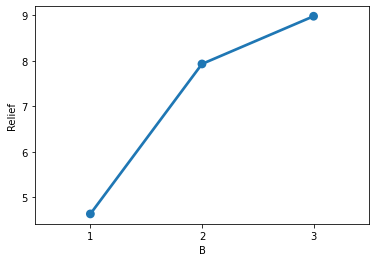

In [37]:
sns.pointplot(x='B', y='Relief',data=df, ci=None,linestyles=["-"])

By looking at above point plot we can say that,Number of relief hours increases as we increase level of ingerdient B.

Let's Compare the Variable A and B in one graph, Interaction Plot

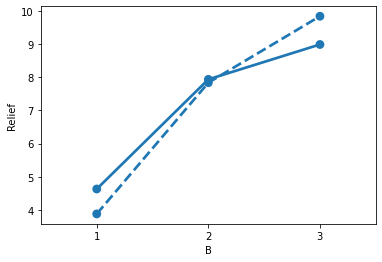

In [34]:
sns.pointplot(x='A', y='Relief' ,data=df, ci=None, linestyles=["--"])
sns.pointplot(x='B', y='Relief',data=df, ci=None,linestyles=["-"])

In Above graph,We can see two lines,intersecting each other,<br>
For Level 1, B shows greater effect than A--> Number of Relief hours is high for B ingredient.<br>
For Level 2, Both same Almost Same effect on Volunteer  -->Number of Relief hours is same for both ingredients.<br>
For Level 3, A shows greater effect than B--> Number of Relief hours is high for A ingredient.<br>

From the above results, it can be stated that in case of both (A & B) number of relief hours tend to increase with increae in the amount of ingredients

##### 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

The primary purpose of a two-way ANOVA is to understand if there is an interaction between the two independent variables on the dependent variable.

Ho=> mu1=mu2=mu3=mu4(All volunteers shows same behaviour,Relief hours are independent to Level of A and B i.e Means are equal,Relief hours does not depends level of A and B) <br>
Ha=> mu1!=mu2!=mu3!=mu4(All volunteers shows different behaviour i.e Atleast One mean is not equal,Relief hours depends on levels of A and B Combination)

In [40]:
model1 = ols('Relief ~ C(A) + C(B) + C(A):C(B)', data=df).fit()
aov_table=anova_lm(model1,type=2)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


By Performing two way Analysis, we can see the P values of A / B / A and B are less than 0.05, Null Hypothesis is Rejected.<br>
Interaction of A and B affects No of Relief hours.

It suggests that both A and B affect Relief, Individually and Combining both.

##### 1.6) Mention the business implications of performing ANOVA for this particular case study.

From the One way Anova test for Variable A, we got to Know That variable A is related to Relief hours. So While Producing Drug we have to consider A and Level of A.
This Ingredient cannot be ignored.

From the One way Anova test for Variable B, we got to Know That variable A is related to Relief hours. So While Producing Drug we have to consider ingredient A and Level of A.
This Ingredient cannot be ignored.

From the Two Way Anova we got to know that there is Interaction effect between ingredient A and ingredient B. These both might create wonders in case of Result as relief. So by Performing Further Tests we can Say to what proportion they must be added to get maximum results.

It is Mandatory to Look at all aspects of Ingerdient A and B, While designing the effective Drug.
To take a Business Descision as which ingredient is making maximum effect or which is combination is 
better, one can perform Tukey honest Significant Difference.